# Pruebas de una sola grabación

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ordered_set import OrderedSet
import pickle

In [7]:
import sys
sys.path.append('..')
# Custom imports
from analysis_utils import DataContainer, plot_time_progression, color_map, calculate_mae, calculate_rmse, calculate_gain, plot_ref_gain, plot_ref_mae_rmse, calculate_stdev, plot_ambient_results, print_ambient_results

## Cargar datos

In [3]:
with open("../results/single_shot_tests/t_wting_f.pkl", 'rb') as file:
    time_weighting_data_F = pickle.load(file)

with open("../results/single_shot_tests/t_wting_s.pkl", 'rb') as file:
    time_weighting_data_S = pickle.load(file)

with open("../results/single_shot_tests/stability.pkl", 'rb') as file:
    stability_data = pickle.load(file)

with open("../results/single_shot_tests/ambient_s.pkl", 'rb') as file:
    ambient_data_S = pickle.load(file)

In [4]:
with open("../results/single_shot_tests/t_wting_f_ref.pkl", 'rb') as file:
    time_weighting_data_F_ref = pickle.load(file)

with open("../results/single_shot_tests/t_wting_s_ref.pkl", 'rb') as file:
    time_weighting_data_S_ref = pickle.load(file)

with open("../results/single_shot_tests/ambient_s_ref.pkl", 'rb') as file:
    ambient_data_S_ref = pickle.load(file)

## Ruido ambiental con periodo S

Mediciones en función del tiempo, para cada volumen

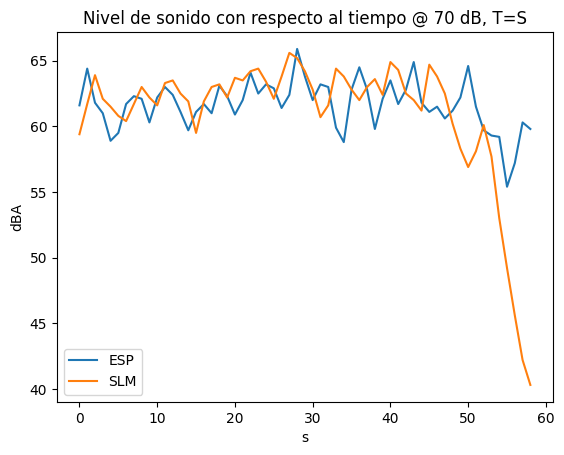

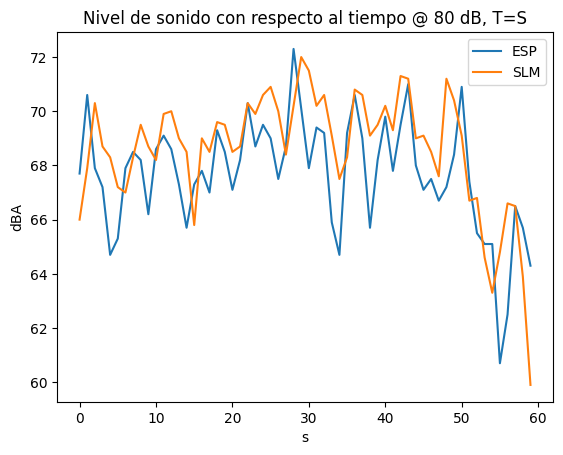

In [5]:
plot_ambient_results(ambient_data_S, ambient_data_S_ref, 1.0)

Error absoluto promedio (MAE) y error RMS (RMSE), para cada volumen

In [8]:
print_ambient_results(ambient_data_S, ambient_data_S_ref, 1.0)

Volumen: 70 dB, MAE: 2.652542372881356 dBA, RMSE: 4.514064649627534 dBA
Volumen: 80 dB, MAE: 1.6449999999999994 dBA, RMSE: 1.9783410558681047 dBA


## Estabilidad

Mediciones en función del tiempo

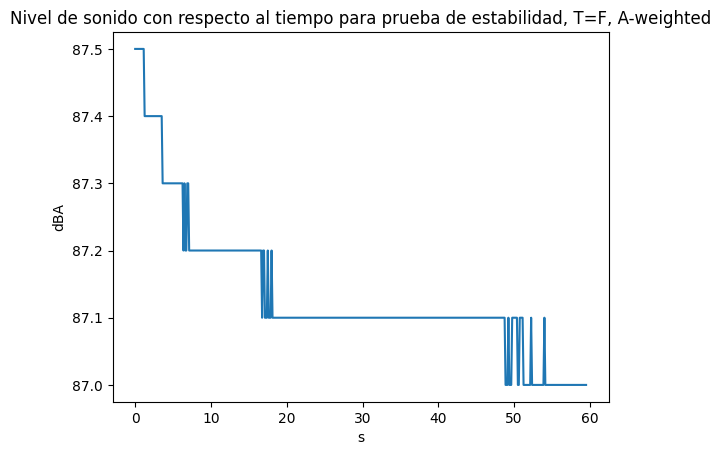

In [10]:
plot_time_progression(stability_data, None, "dBA", " para prueba de estabilidad, T=F, A-weighted", 0.125)

Desviación estándar

In [11]:
calculate_stdev(stability_data)

0.10597105833196309

Criterio de estabilidad según IEC 61672

In [12]:
# Array index at which the measurements reach the reference level
index = 10

delta = abs(stability_data[index] - stability_data[-index])
print(f"Diferencia entre mediciones iniciales y finales: {delta}")

Diferencia entre mediciones iniciales y finales: 0.4000000000000057


## Ponderación de tiempo con periodo F

Mediciones en función del tiempo

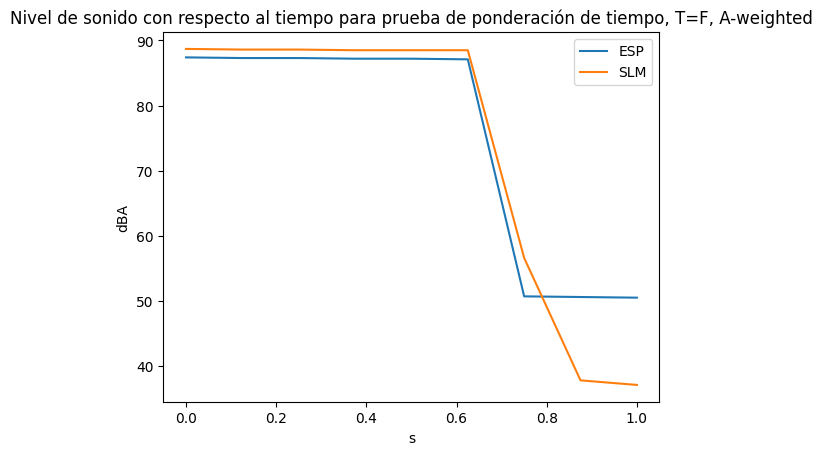

In [14]:
plot_time_progression(time_weighting_data_F, time_weighting_data_F_ref, "dBA", " para prueba de ponderación de tiempo, T=F, A-weighted", 0.125)

Error absoluto promedio (MAE) y error RMS (RMSE)

In [15]:
print(f"MAE: {calculate_mae(time_weighting_data_F, time_weighting_data_F_ref)}")
print(f"RMSE: {calculate_rmse(time_weighting_data_F, time_weighting_data_F_ref)}")

MAE: 4.444444444444444
RMSE: 6.571149062378664


## Ponderación de tiempo con periodo S

Mediciones en función del tiempo

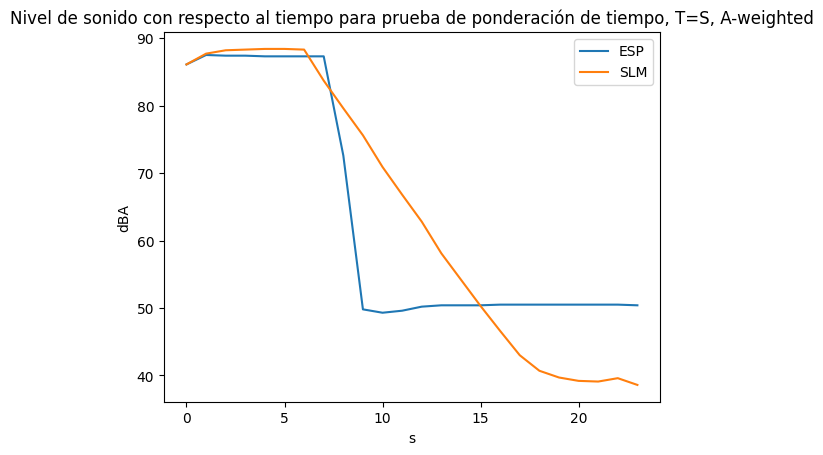

In [16]:
plot_time_progression(time_weighting_data_S, time_weighting_data_S_ref, "dBA", " para prueba de ponderación de tiempo, T=S, A-weighted", 1.0)

Error absoluto promedio (MAE) y error RMS (RMSE)

In [17]:
print(f"MAE: {calculate_mae(time_weighting_data_S, time_weighting_data_S_ref)}")
print(f"RMSE: {calculate_rmse(time_weighting_data_S, time_weighting_data_S_ref)}")

MAE: 7.579166666666666
RMSE: 10.26168033673498
